In [1]:
!pip install qiskit[visualization]==1.0.2

### Reference - https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_0/lab-0.ipynb

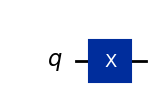

In [2]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [3]:
### Install the other required packages as well
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-y13o2778
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-y13o2778
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 87d951509bdb78ecd3ec2c6f93b548590b3b2d17
  Preparing metadata (setup.py) ... done


In [4]:
### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'1.0.2'

In [5]:
### CHECK OTHER DEPENDENCIES
!pip show pylatexenc matplotlib qc_grader

#qc-grader should be 0.18.8 (or higher)

Name: pylatexenc
Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
---
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick
---
Name: qc-grader
Version: 0.18.8
Summary: Grading client for the IBM Quantum Challenge
Home-page: https://quantum.ibm.com/
Author: IBM Q

In [11]:
%set_env QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b

env: QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b


In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qc_grader.challenges.iqc_2024 import grade_lab0_ex1

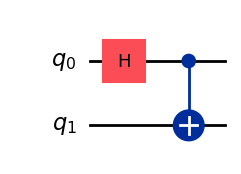

In [8]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

We also want to be able to visualize that our circuit does what we expect it to do. To accomplish this, let's set up some operators.

Here we create some operators for our two qubits. Some (like XX) measure both qubits, while others (like XI) only measure one. Later we will check their expectation values to make sure our circuit is working properly. Because we've created an entangled Bell state, we should expect that our operators only measuring one qubit have an expectation value of 0. Similarly, we should expect the operators which measure both qubits to come back with some non-zero (hopefully close to 1) expectation value.

How do we do this? We simply use a combination of X, Z, and Identity (I) operators.

Applying an I gate to a qubit is the same as doing nothing to a qubit. We can use a combination of X/Z and I to make the operators of XI, IX, ZI, and IZ.
We only have two operators which measure both qubits: XX and ZZ. We use a combination of X or Z gates to make each one, respectfully.
Later on in this lab, you will graph the expectation values for each of these operators to visualize your circuit.

Exercise 1
Hey, look at us. Who would have thought — we made it to our first Challenge exercise!

In this first exercise, you should complete the list of operators. We have provided three for you already: the ZZ, ZI, and IX observables. We've also written comments in the code explaining what each observable is looking for.

Following the same approach, your task is to create the last three operators: IZ, XX, and XI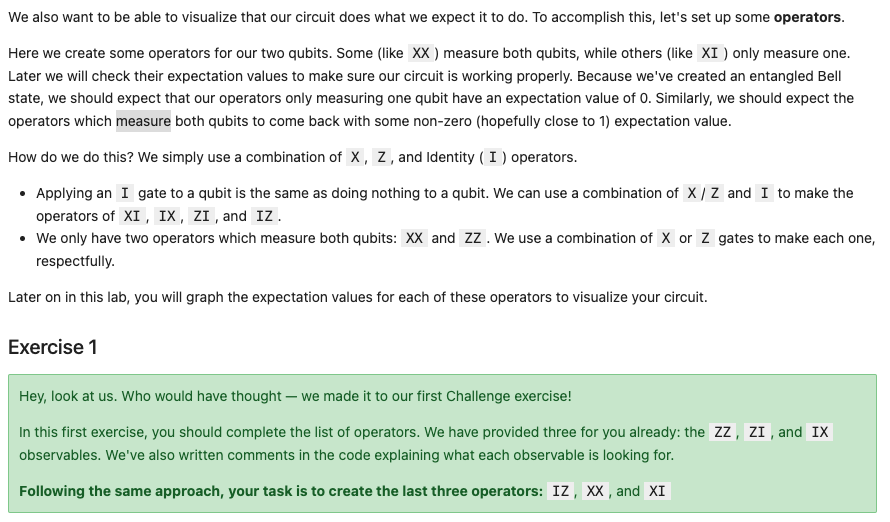

In [9]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')

XI = SparsePauliOp('XI')

### Write your code below here ###
### Follow the same naming convention we used above



## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [12]:
# Submit your answer using following code

grade_lab0_ex1(observables)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


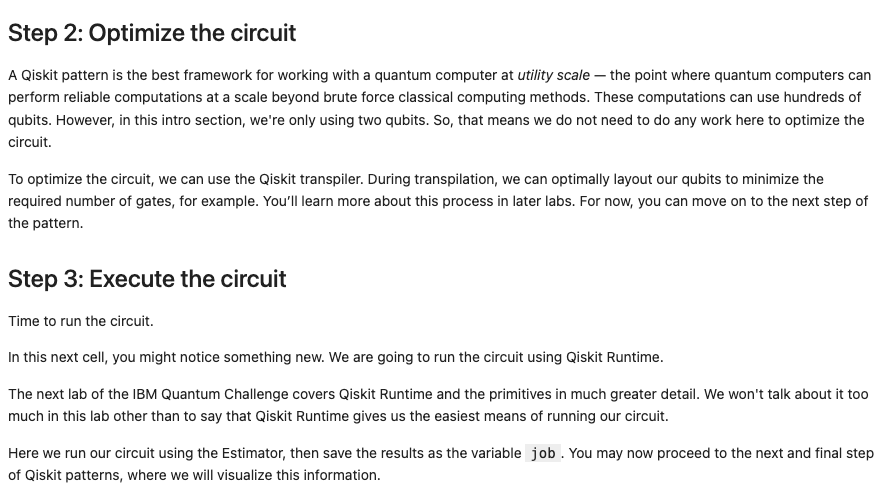

In [13]:
# Set up the Estimator
estimator = Estimator(backend=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

#Step 4: Post-process the results
The last step of Qiskit patterns is where we process, analyze, and visualize the results of our job.

There are many ways you can choose to do this. We showcase a number of different options throughout the IBM Quantum Challenge. It's always a great day to learn something new!

Here we are going to collect our data and plot it on a graph we construct.

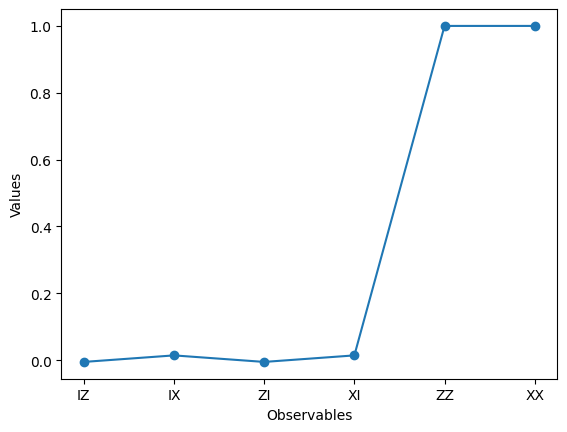

In [14]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

You should see the operators which measure both qubits (ZZ and XX) have a value that's close to 1, and the other operators have a value that's close to 0. This shows that your circuit is entangled. Great work.

The plot displays as a line graph, but you can also visualize this as a bar graph.

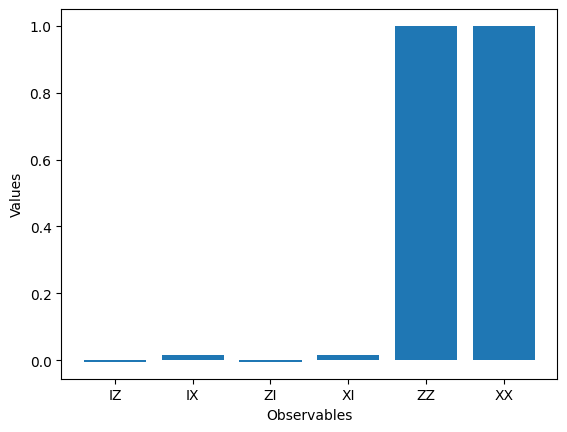

In [15]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()